# The Poetry Project

This notebook explores regression analysis using scikit-learn amongst other libraries.

In the previous script 02 I already formulated the hypothesis "The more I meditate, the more words I write for my poetry". In this script I want to further explore if the correlation between the variable "meditation" and the variable "totalwords all poems" is linear. At first glance it seemed that the relationship between these two variables is not purely linear and more complex than that but I want to rule out linearity in a more scientific way than simply looking at a visual. So, let's do this!

### Contents of this notebook
#### 1. Importing libraries
#### 2. Importing dataframe
#### 3. Data checks
#### 4. Data prep for regression analysis
#### 5. Regression analysis
#### 6. Performance improvement after removing outliers?

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

### 2. Importing dataframe

In [3]:
poetry = pd.read_excel(r'C:\Users\veren\Python Data\persoenliche-projekte\The Poetry Project\02 Data\Prepared Data\poetry-project-data-complete-medcat.xlsx', index_col=False)

In [4]:
poetry.shape

(91, 29)

In [5]:
pd.options.display.max_rows = None
poetry.head(91)

,Unnamed: 0,Date,Day of the week,Weather,Food,Sport,Meditation,Dance,Music,Kind of music,...,cleaned poem,cleaned additional poem 1,cleaned additional poem 2,totalwords poem,totalwords additional poem 1,totalwords additional poem 2,totalwords all poems,all poems together,no of poems per day,meditation length category
0,0,2021-08-06,Friday,sunny,fresh,0.0,30,0,20,classical,...,It slithers Leaves from my chest When the sun ...,0,0,28,0,0,28,It slithers Leaves from my chest When the sun ...,1,medium meditation
1,1,2021-08-07,Saturday,cloudy,fresh,20.0,60,20,0,0,...,The touch of your skin Is a meandering Forest ...,The night sky is lingering Over the chest of ...,Let me blow the horn of vastness For you and ...,11,38,42,91,The touch of your skin Is a meandering Forest ...,3,long meditation
2,2,2021-08-08,Sunday,cloudy,fresh,0.0,60,0,0,eclectic,...,0,0,0,0,0,0,0,0 0 0,0,long meditation
3,3,2021-08-09,Monday,cloudy,fresh,0.0,30,0,0,0,...,0,0,0,0,0,0,0,0 0 0,0,medium meditation
4,4,2021-08-10,Tuesday,cloudy,fresh,0.0,60,0,0,0,...,The deep yearning to learn something about you...,0,0,13,0,0,13,The deep yearning to learn something about you...,1,long meditation
5,5,2021-08-11,Wednesday,cloudy,fresh,0.0,60,0,20,NaN,...,Did I see an I Where you used to be? A tranqui...,0,0,26,0,0,26,Did I see an I Where you used to be? A tranqui...,1,long meditation
6,6,2021-08-12,Thursday,sunny,fresh,0.0,60,0,0,0,...,I didn't know I could miss somebody I barely ...,0,0,18,0,0,18,I didn't know I could miss somebody I barely ...,1,long meditation
7,7,2021-08-13,Friday,sunny,fresh,0.0,60,0,0,0,...,0,0,0,0,0,0,0,0 0 0,0,long meditation
8,8,2021-08-14,Saturday,sunny,convenience,10.0,30,0,0,0,...,0,0,0,0,0,0,0,0 0 0,0,medium meditation
9,9,2021-08-15,Sunday,sunny,fresh,0.0,60,0,0,0,...,I don't want to be an obedient woman anymore I...,0,0,24,0,0,24,I don't want to be an obedient woman anymore I...,1,long meditation


In [6]:
# Dropping the index column

poetry.drop(poetry.columns[0], axis = 1, inplace = True)

In [7]:
pd.options.display.max_rows = None
poetry.head(91)

,Date,Day of the week,Weather,Food,Sport,Meditation,Dance,Music,Kind of music,Guitar,...,cleaned poem,cleaned additional poem 1,cleaned additional poem 2,totalwords poem,totalwords additional poem 1,totalwords additional poem 2,totalwords all poems,all poems together,no of poems per day,meditation length category
0,2021-08-06,Friday,sunny,fresh,0.0,30,0,20,classical,0,...,It slithers Leaves from my chest When the sun ...,0,0,28,0,0,28,It slithers Leaves from my chest When the sun ...,1,medium meditation
1,2021-08-07,Saturday,cloudy,fresh,20.0,60,20,0,0,0,...,The touch of your skin Is a meandering Forest ...,The night sky is lingering Over the chest of ...,Let me blow the horn of vastness For you and ...,11,38,42,91,The touch of your skin Is a meandering Forest ...,3,long meditation
2,2021-08-08,Sunday,cloudy,fresh,0.0,60,0,0,eclectic,0,...,0,0,0,0,0,0,0,0 0 0,0,long meditation
3,2021-08-09,Monday,cloudy,fresh,0.0,30,0,0,0,0,...,0,0,0,0,0,0,0,0 0 0,0,medium meditation
4,2021-08-10,Tuesday,cloudy,fresh,0.0,60,0,0,0,0,...,The deep yearning to learn something about you...,0,0,13,0,0,13,The deep yearning to learn something about you...,1,long meditation
5,2021-08-11,Wednesday,cloudy,fresh,0.0,60,0,20,NaN,0,...,Did I see an I Where you used to be? A tranqui...,0,0,26,0,0,26,Did I see an I Where you used to be? A tranqui...,1,long meditation
6,2021-08-12,Thursday,sunny,fresh,0.0,60,0,0,0,0,...,I didn't know I could miss somebody I barely ...,0,0,18,0,0,18,I didn't know I could miss somebody I barely ...,1,long meditation
7,2021-08-13,Friday,sunny,fresh,0.0,60,0,0,0,0,...,0,0,0,0,0,0,0,0 0 0,0,long meditation
8,2021-08-14,Saturday,sunny,convenience,10.0,30,0,0,0,0,...,0,0,0,0,0,0,0,0 0 0,0,medium meditation
9,2021-08-15,Sunday,sunny,fresh,0.0,60,0,0,0,0,...,I don't want to be an obedient woman anymore I...,0,0,24,0,0,24,I don't want to be an obedient woman anymore I...,1,long meditation


### 3. Data checks

In [8]:
# Checking for missing values

poetry.isnull().sum()

Date                            0
Day of the week                 0
Weather                         0
Food                            0
Sport                           1
Meditation                      0
Dance                           0
Music                           0
Kind of music                   6
Guitar                          0
Reading                         5
Type of reading                 6
Mood in the evening             0
sleep quality night before      0
mindfulness                     0
poem                            0
additional poem 1               0
additional poem 2               0
cleaned poem                    0
cleaned additional poem 1       0
cleaned additional poem 2       0
totalwords poem                 0
totalwords additional poem 1    0
totalwords additional poem 2    0
totalwords all poems            0
all poems together              0
no of poems per day             0
meditation length category      0
dtype: int64

C:\Users\veren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Meditation', ylabel='Density'>

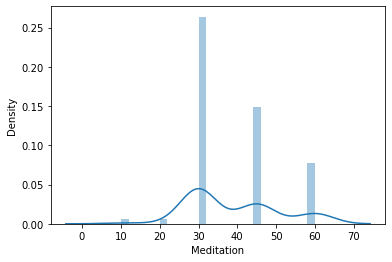

In [9]:
# Checking for extreme values in "Meditation"

sns.distplot(poetry['Meditation'], bins=25)

It is always important to check for outliers first before you train your model. In this case I am certain that my outliers are "true outliers" and no errors, so I can keep them in the dataset.

In [10]:
# Checking the mean, median and the max for "totalwords all poems" and "Meditation"

poetry[['totalwords all poems', 'Meditation']].describe()

,totalwords all poems,Meditation
count,91.000000,91.000000
mean,11.450549,38.736264
std,18.424780,11.656982
min,0.000000,10.000000
25%,0.000000,30.000000
50%,0.000000,30.000000
75%,22.500000,45.000000
max,91.000000,60.000000


### 4. Data prep for regression analysis

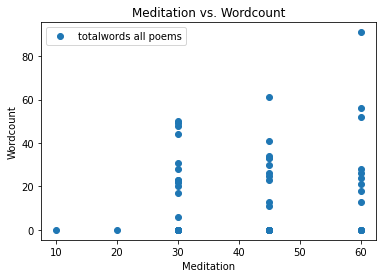

In [11]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

poetry.plot(x = 'Meditation', y='totalwords all poems',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Meditation vs. Wordcount')  
plt.xlabel('Meditation')  
plt.ylabel('Wordcount')  
plt.show()

There is definitely some trend in the data, it is just not so easy to spot because there are not so many data points.

In [12]:
# Reshaping the variables into NumPy arrays and putting them into separate objects

X = poetry['Meditation'].values.reshape(-1,1)
y = poetry['totalwords all poems'].values.reshape(-1,1)

In [13]:
X

array([[30],
       [60],
       [60],
       [30],
       [60],
       [60],
       [60],
       [60],
       [30],
       [60],
       [45],
       [60],
       [45],
       [45],
       [60],
       [60],
       [45],
       [60],
       [60],
       [45],
       [45],
       [45],
       [45],
       [45],
       [45],
       [45],
       [45],
       [60],
       [45],
       [30],
       [45],
       [45],
       [45],
       [30],
       [45],
       [45],
       [45],
       [45],
       [45],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [10],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [45],
       [45],
       [45],
       [30],
       [45],
       [45],
       [30],
       [30],
       [30],
       [30],
       [30],
       [60],

In [14]:
y

array([[28],
       [91],
       [ 0],
       [ 0],
       [13],
       [26],
       [18],
       [ 0],
       [ 0],
       [24],
       [33],
       [ 0],
       [11],
       [41],
       [ 0],
       [21],
       [26],
       [56],
       [52],
       [ 0],
       [13],
       [ 0],
       [ 0],
       [25],
       [ 0],
       [34],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [33],
       [30],
       [20],
       [ 0],
       [ 0],
       [61],
       [ 0],
       [ 0],
       [ 0],
       [31],
       [49],
       [ 0],
       [ 0],
       [ 0],
       [23],
       [ 0],
       [ 0],
       [22],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [44],
       [ 0],
       [48],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [17],
       [ 0],
       [23],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 6],
       [28],

In [15]:
# Splitting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression analysis

In [16]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [17]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train) # training the model

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test) # using the model on the test data set to predict some y values and see how accurate they are.

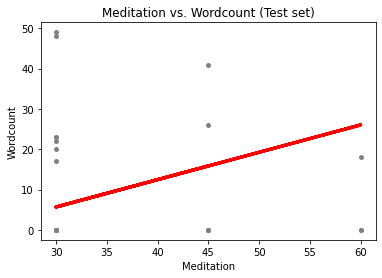

In [19]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Meditation vs. Wordcount (Test set)')
plot_test.xlabel('Meditation')
plot_test.ylabel('Wordcount')
plot_test.show()

In [20]:
# In order to check the accuracy of the model, I'm checking its performance in more ways than just visually.
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [21]:
# Printing the model's summary statistics. This is where I evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.67774343]]
Mean squared error:  316.06967398658026
R2 score:  -0.3257856816784761


The **slope coefficient** indicates how the y variable changes when X changes. This indicates a **moderately positive linear relationship**. However, it doesn’t actually tell me how well my model performed. The following indicators are way more important for that:

The **root mean squared error (MSE)** is an estimator that measures the average of the squared difference between the estimated values and the true values. Put more simply, it states how close a regression line is to a set of points (i.e., its accuracy). A big MSE, however, means that the regression line passes not very close to the observations, making it not a good fit. I would interpret 316 as a big MSE, so **the linear regression line is not a good fit** for this analysis.

The **R2 score** or R squared is a metric that shows how well the model explains the variance in the data. It’s a number (usually) between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. I would interpret -0.3 as close to zero and thereby **a poor fit**.

In [22]:
# Making a dataframe of y values and their predicted values to further see the performance of the model 

y_predicted

array([[26.02309806],
       [15.85694659],
       [ 5.69079512],
       [ 5.69079512],
       [ 5.69079512],
       [15.85694659],
       [ 5.69079512],
       [ 5.69079512],
       [ 5.69079512],
       [ 5.69079512],
       [26.02309806],
       [15.85694659],
       [ 5.69079512],
       [ 5.69079512],
       [ 5.69079512],
       [15.85694659],
       [15.85694659],
       [ 5.69079512],
       [15.85694659],
       [ 5.69079512],
       [15.85694659],
       [26.02309806],
       [ 5.69079512],
       [ 5.69079512],
       [ 5.69079512],
       [ 5.69079512],
       [ 5.69079512],
       [15.85694659]])

In [23]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,26.023098
1,41,15.856947
2,0,5.690795
3,49,5.690795
4,0,5.690795
5,0,15.856947
6,23,5.690795
7,0,5.690795
8,0,5.690795
9,23,5.690795


This output shows there’s **a huge difference between the actual and predicted y values**. This is evidence that the model isn’t doing a great job of explaining the relationship between the “Meditation” and “Wordcount” variables. **The relationship simply doesn’t follow a single, straight regression line (so a single, straight regression line won’t be able to accurately predict anything!).**

In [24]:
# Comparing how the regression fits the training set

y_predicted_train = regression.predict(X_train) 

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.67774343]]
Mean squared error:  310.68897829897315
R2 score:  0.17824347468031088


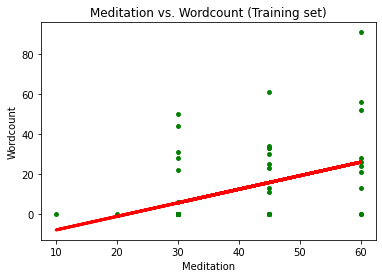

In [27]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Meditation vs. Wordcount (Training set)')
plot_test.xlabel('Meditation')
plot_test.ylabel('Wordcount')
plot_test.show()

It's obvious that there are just too many outliers. Maybe I can make the regression line a good fit by removing some of them? Let's just try and see what it does. 

### 6. Performance improvement after removing outliers?

In [28]:
# Cleaning the extreme values from the "Wordcount" variable observed during the consistency checks.

df_test = poetry[poetry['totalwords all poems'] <=50] 

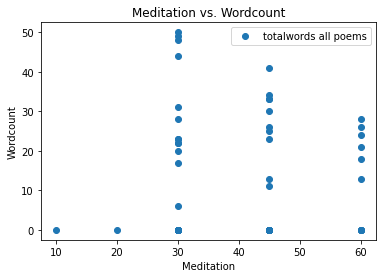

In [29]:
# Checking how the scatterplot looks without the outliers.

df_test.plot(x = 'Meditation', y='totalwords all poems', style='o')  
plt.title('Meditation vs. Wordcount')  
plt.xlabel('Meditation')  
plt.ylabel('Wordcount')  
plt.show()

In [30]:
# Reshaping again.

X_2 = df_test['Meditation'].values.reshape(-1,1)
y_2 = df_test['totalwords all poems'].values.reshape(-1,1)

In [31]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [32]:
# Running and fitting the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [33]:
# Predicting

y_predicted_2 = regression.predict(X_test_2)

In [34]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.24443701]]
Mean squared error:  172.79237710251624
R2 score:  -0.09680310417015847


Well, the mean squared error is almost half now, but still pretty high. That doesn't look goood in terms of linearity, but let's continue!

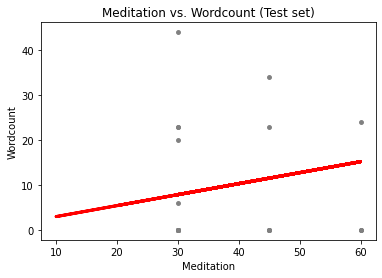

In [36]:
# Visualizing the test set results.

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_train_2, regression.predict(X_train_2), color='red', linewidth =3)
plot_test.title('Meditation vs. Wordcount (Test set)')
plot_test.xlabel('Meditation')
plot_test.ylabel('Wordcount')
plot_test.show()

In [37]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0,7.855613
1,0,15.188723
2,0,7.855613
3,23,7.855613
4,23,11.522168
5,20,7.855613
6,0,7.855613
7,0,7.855613
8,0,11.522168
9,23,7.855613


The output still shows a big difference between the actual and predicted y values. **A linear regression model really doesn't seem to be a good fit for my dataset!**